In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/telecom_churn.csv


In [2]:
df = pd.read_csv("../input/telecom-churn/telecom_churn.csv")

In [3]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [4]:
df.isnull().any()

Churn              False
AccountWeeks       False
ContractRenewal    False
DataPlan           False
DataUsage          False
CustServCalls      False
DayMins            False
DayCalls           False
MonthlyCharge      False
OverageFee         False
RoamMins           False
dtype: bool

In [5]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

In [7]:
y.unique()

array([0, 1])

In [8]:
y.sum()

483

In [9]:
len(y) - y.sum()

2850

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
X_train.shape

(2666, 10)

In [12]:
X_test.shape

(667, 10)

In [13]:
y_train.sum()

395

In [14]:
len(y_train) - y_train.sum()

2271

In [15]:
y_test.sum()

88

In [16]:
len(y_test) - y_test.sum()

579

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))),
  ('feature_selection', SelectKBest(f_classif)),  
  ('classification', RandomForestClassifier(random_state=0))
])


In [18]:
params = {
    'feature_selection__k' : [3, 5, 7],
    'classification__n_estimators' : [10,20,50,100,200],
    'classification__max_depth' : [3, 5, 7]
}
best_clf = GridSearchCV(clf, params, cv=10)
best_clf.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'classification__max_depth': [3, 5, 7],
                         'classification__n_estimators': [10, 20, 50, 100, 200],
                         'feature_selection__k': [3, 5, 7]})

In [19]:
best_clf.best_score_ #Training Accuracy FASTEST

0.9291177381656388

In [20]:
best_clf.best_params_

{'classification__max_depth': 7,
 'classification__n_estimators': 50,
 'feature_selection__k': 7}

In [21]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf, X_train, y_train, cv=10)
print("10CV Training Accuracy : "+str(acc.mean()))

10CV Training Accuracy : 0.9351130635577707


In [22]:
y_predict = best_clf.predict(X_test)
sum(y_predict == y_test)/len(y_test)

0.9295352323838081

In [23]:
from sklearn.metrics import classification_report #ใช้ได้สองclassเท่านั้น
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       598
           1       0.62      0.80      0.70        69

    accuracy                           0.93       667
   macro avg       0.80      0.87      0.83       667
weighted avg       0.94      0.93      0.93       667



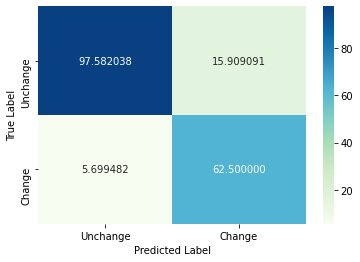

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['Unchange', 'Change']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))),
  ('feature_selection', SelectKBest(f_classif)),  
  ('classification', SVC(random_state=0))
])

In [26]:
params = {
    'feature_selection__k' : [3, 5, 7],
    'classification__C' : [1,2,4,8,16,32],
    'classification__gamma' : [0.0625,0.0125,0.025,0.05,0.01,0,1,2,4,8,16,32]
}
best_clf = GridSearchCV(clf, params, cv=10)
best_clf.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        SVC(random_state=0))]),
             param_grid={'classification__C': [1, 2, 4, 8, 16, 32],
                         'classification__gamma': [0.0625, 0.0125, 0.025, 0.05,
                                                   0.01, 0, 1, 2, 4, 8, 16,
                                                   32],
                         'feature_selection__k': [3, 5, 7]})

In [27]:
best_clf.best_score_

0.9156106558531159

In [28]:
best_clf.best_params_

{'classification__C': 32,
 'classification__gamma': 4,
 'feature_selection__k': 7}

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))),
  #('feature_selection', SelectKBest(f_classif)),  
  ('classification', ExtraTreesClassifier(random_state=0))
])

In [30]:
params = {
    'classification__n_estimators' : [10,20,50,100,200],
}
best_clf = GridSearchCV(clf, params, cv=10)
best_clf.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classification',
                                        ExtraTreesClassifier(random_state=0))]),
             param_grid={'classification__n_estimators': [10, 20, 50, 100,
                                                          200]})

In [31]:
best_clf.best_score_

0.9298555377207063

In [32]:
y_predict = best_clf.predict(X_test)
sum(y_predict == y_test)/len(y_test)

0.9250374812593704

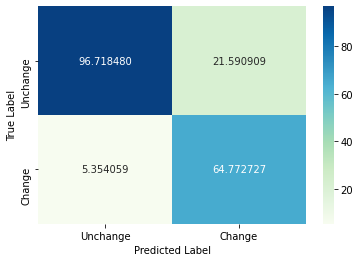

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['Unchange', 'Change']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [34]:
f = best_clf.best_estimator_.steps[-1][1].feature_importances_

In [35]:
f_idx = np.argsort(-f)
f_idx

array([7, 5, 4, 8, 9, 1, 6, 0, 3, 2])

In [36]:
X.columns.values[f_idx] #ลำดับความสำคัญ

array(['MonthlyCharge', 'DayMins', 'CustServCalls', 'OverageFee',
       'RoamMins', 'ContractRenewal', 'DayCalls', 'AccountWeeks',
       'DataUsage', 'DataPlan'], dtype=object)

In [37]:
X.columns

Index(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

# HomeWork SMOTE

**RandomForest**

In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier

sm = SMOTE(random_state=1)
X_train, y_train = sm.fit_resample(X_train, y_train)

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))),
  ('feature_selection', SelectKBest(f_classif)),  
  ('classification', RandomForestClassifier(random_state=0))
])


In [51]:
params = {
    'feature_selection__k' : [3, 5, 7, 10],
    'classification__n_estimators' : [10,20,50,100,1000],
    'classification__max_depth' : [3, 5, 7, 10, 18, 25]
}
best_clf = GridSearchCV(clf, params, cv=10)
best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'classification__max_depth': [3, 5, 7, 10, 18, 25],
                         'classification__n_estimators': [10, 20, 50, 100,
                                                          1000],
                         'feature_selection__k': [3, 5, 7, 10]})

In [52]:
print("10CV Training Accuracy : "+str(best_clf.best_score_))

10CV Training Accuracy : 0.9295517258072324


In [53]:
y_predict = best_clf.predict(X_test)
sum(y_predict == y_test)/len(y_test)

0.8920539730134932

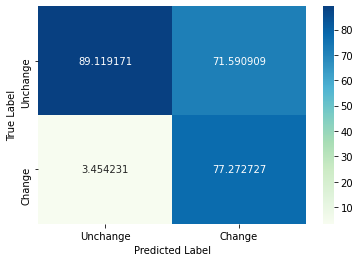

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['Unchange', 'Change']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

**ExtraTrees**

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

sm = SMOTE(random_state=1)
X_train, y_train = sm.fit_resample(X_train, y_train)
clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))),
  ('feature_selection', SelectKBest(f_classif)),  
  ('classification', ExtraTreesClassifier(random_state=0))
])

In [44]:
y_train.shape

(4542,)

In [45]:
params = {
    'feature_selection__k' : [3, 5, 7],
    'classification__n_estimators' : [10,20,50,100,200],
    'classification__max_depth' : [3, 5, 7]
}
best_clf = GridSearchCV(clf, params, cv=10)
best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        ExtraTreesClassifier(random_state=0))]),
             param_grid={'classification__max_depth': [3, 5, 7],
                         'classification__n_estimators': [10, 20, 50, 100, 200],
                         'feature_selection__k': [3, 5, 7]})

In [46]:
print("10CV Training Accuracy : "+str(best_clf.best_score_))

10CV Training Accuracy : 0.8740727114295396


In [47]:
y_predict = best_clf.predict(X_test)
sum(y_predict == y_test)/len(y_test)

0.8665667166416792

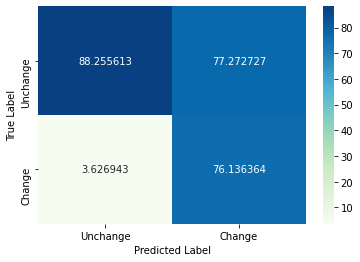

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['Unchange', 'Change']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()